<a href="https://colab.research.google.com/github/4yonatan4/hr_who_is_going_to_quit/blob/master/Notebook_Models_and_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **One hot encoding**

Here we build a Logistic classifier for predicting who survived the Titanic.
The dataset is available here:
https://www.kaggle.com/c/titanic/data

We will need to encode some of the categorical features with one-hot features.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
!git clone https://github.com/kfirbar/course-ml-data

Cloning into 'course-ml-data'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 31 (delta 5), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
# loading Titanic survival dataset

data = pd.read_csv('/content/course-ml-data/titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

Our response variable is **Survived** indicating who survived the Titanic. We will use four features: Pclass, Sex, Age and Fare.

Pclass is the Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

For more information, please refer to https://www.kaggle.com/c/titanic/data


# Pre-processing

In [ ]:
# First, let's filter out the features we don't need
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
X.head(1)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.25,0


In [ ]:
# Pclass and sex are categorical features. Let's encode them.
# We use get_dummies(). For more information: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

X = pd.concat([X, pd.get_dummies(X['Sex'], prefix='Gender')], axis=1)

In [ ]:
X.head()

,Pclass,Sex,Age,Fare,Survived,Gender_female,Gender_male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1


In [ ]:
# Let's do the same for Pclass

X = pd.concat([X, pd.get_dummies(X['Pclass'], prefix='Pclass')], axis=1)

X.head()

,Pclass,Sex,Age,Fare,Survived,Gender_female,Gender_male,Pclass_1,Pclass_2,Pclass_3
0,3,male,22.0,7.2500,0,0,1,0,0,1
1,1,female,38.0,71.2833,1,1,0,1,0,0
2,3,female,26.0,7.9250,1,1,0,0,0,1
3,1,female,35.0,53.1000,1,1,0,1,0,0
4,3,male,35.0,8.0500,0,0,1,0,0,1


In [ ]:
# Let's remove the original features

X = X.drop(columns=['Sex', 'Pclass'])

In [ ]:
X.head()

,Age,Fare,Survived,Gender_female,Gender_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0,0,1,0,0,1
1,38.0,71.2833,1,1,0,1,0,0
2,26.0,7.9250,1,1,0,0,0,1
3,35.0,53.1000,1,1,0,1,0,0
4,35.0,8.0500,0,0,1,0,0,1


In [ ]:
# Important - we should handle NaNs

# First, let's see if there are any NaNs in the data

# dataframe.isnull() returns a DF with similar shape, with boolean indicating True for Nans

X.isnull().any(axis=0)

# We have NaNs only in Age

Age               True
Fare             False
Survived         False
Gender_female    False
Gender_male      False
Pclass_1         False
Pclass_2         False
Pclass_3         False
dtype: bool

In [ ]:
X.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# How many?
X[X.isnull().any(axis=1)].shape[0]

# 177 out of 891. Too many. For now, let's just remove them. We will discuss later a few other techniques for imputing missing data

177

In [ ]:
# Removing NaNs

X = X.dropna()

X.shape

(714, 8)

In [ ]:
# We are ready to train and evaluate a classifier.
# First, let's split the data into train and test and train fit a Logistic classifier
  
y = X['Survived']  
X = X.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr = LogisticRegression()

lr.fit(X_train, y_train)

# An error appears - we have NaN values in our dataset. We have to remove them first.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Now let's predict 
lr.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
# Calculating confusion matrix for the test set

y_hat_test = lr.predict(X_test)
confusion_matrix(y_test, y_hat_test)

array([[113,  21],
       [ 24,  57]])

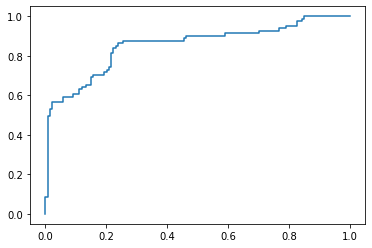

AUC= 0.773493642896628


In [ ]:
# Plotting ROC curve
# Using http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

y_hat_probs = lr.predict_proba(X_test)[:, 1:]
fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs)
plt.plot(fpr, tpr)
plt.show()
auc = roc_auc_score(y_test, y_hat_test)
print("AUC=", auc)


In [ ]:
# We can try to treat age as a categorical feature

X['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# We use the pandas cut function. For more info, please refer to https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = range(1, 11)
X['Age_binned'] = pd.cut(X['Age'], bins=bins, labels=labels)

X = X.drop(columns=['Age'])

# and now let's encode Age_binned as one-hot representation
X = pd.concat([X, pd.get_dummies(X['Age_binned'], prefix='Age_binned')], axis=1)
X = X.drop(columns=['Age_binned'])

In [ ]:
# Let's train once again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat_test = lr.predict(X_test)
confusion_matrix(y_test, y_hat_test)

array([[113,  21],
       [ 25,  56]])